In [1]:
# Import dependencies
import pandas as pd
import re
import numpy as np
from sqlalchemy import create_engine
import psycopg2
from config import db_password
import time
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
file_path = ('.\Resources\marketing_data.csv')
market_df = pd.read_csv(file_path)
market_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/2014,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/2014,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/2014,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/2014,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/2014,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [3]:
market_df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [4]:
#Remove space from the column name Income
market_df.columns = market_df.columns.str.replace(" ","")
market_df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [5]:
#convert $ salary data to float
market_df[market_df.columns[4]] = market_df[market_df.columns[4]].replace('[\$,]', '', regex=True).astype(float)
market_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/2014,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/2014,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,3/7/2013,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,46310.0,1,0,12/3/2012,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,...,10,3,0,0,0,0,0,0,0,IND


In [6]:
# Covert date to datetime
market_df["Dt_Customer"] = pd.to_datetime(market_df["Dt_Customer"])
# Check the columns' datatypes after converting
market_df.Dt_Customer

0      2014-06-16
1      2014-06-15
2      2014-05-13
3      2014-05-11
4      2014-04-08
          ...    
2235   2013-03-07
2236   2013-01-22
2237   2012-12-03
2238   2012-11-29
2239   2012-09-01
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

In [7]:
# Retrieve value counts for 'marital_status' column
market_df.Marital_Status.value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [8]:
# Drop the rows where 'marital_status' is 'Absurd' or 'YOLO'
market_df = market_df.loc[(market_df["Marital_Status"] != 'Absurd') & (market_df["Marital_Status"] != 'YOLO')]

# Change 'ALone' to 'Single'
market_df['Marital_Status'].replace("Alone","Single", inplace=True)

# Retrieve value counts for 'marital_status' column
market_df.Marital_Status.value_counts()

C:\Users\vijay\anaconda3\envs\PythonData\lib\site-packages\pandas\core\series.py:4515: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Married     864
Together    580
Single      483
Divorced    232
Widow        77
Name: Marital_Status, dtype: int64

In [9]:
# Sort DOB in ascending order
market_df.sort_values(by='Year_Birth')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
513,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,2,4,0,0,0,0,0,0,0,SA
827,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,4,1,0,0,1,0,0,0,0,SP
2233,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,2,5,0,0,0,0,0,0,1,IND
2171,6663,1940,PhD,Single,51141.0,0,0,2013-07-08,96,144,...,4,5,0,0,0,0,0,0,0,SP
1740,6932,1941,PhD,Married,93027.0,0,0,2013-04-13,77,1285,...,5,2,0,0,1,0,0,0,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,10548,1995,Graduation,Single,71163.0,0,0,2014-03-09,30,283,...,12,1,0,0,0,0,0,0,0,GER
1298,4427,1995,2n Cycle,Single,83257.0,0,0,2012-09-18,56,536,...,12,6,1,0,1,0,0,1,1,SP
964,3661,1995,2n Cycle,Single,80617.0,0,0,2012-10-12,42,594,...,8,2,0,0,0,0,0,0,0,IND
1824,193,1996,Basic,Married,14421.0,0,0,2014-02-17,81,0,...,2,5,1,0,0,0,0,0,0,SP


In [10]:
# Drop the columns where the birth year is inconsistant
market_df = market_df.loc[(market_df["Year_Birth"] > 1900)]
market_df.sort_values(by='Year_Birth')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
2171,6663,1940,PhD,Single,51141.0,0,0,2013-07-08,96,144,...,4,5,0,0,0,0,0,0,0,SP
1740,6932,1941,PhD,Married,93027.0,0,0,2013-04-13,77,1285,...,5,2,0,0,1,0,0,0,0,SP
1350,1453,1943,PhD,Widow,57513.0,0,0,2013-07-06,59,735,...,13,6,0,0,0,0,0,0,0,SP
1209,8800,1943,PhD,Divorced,48948.0,0,0,2013-02-01,53,437,...,5,6,1,0,0,0,0,1,0,SA
1208,2968,1943,PhD,Divorced,48948.0,0,0,2013-02-01,53,437,...,5,6,1,0,0,0,0,1,0,AUS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,10548,1995,Graduation,Single,71163.0,0,0,2014-03-09,30,283,...,12,1,0,0,0,0,0,0,0,GER
1467,8315,1995,Graduation,Single,34824.0,0,0,2014-03-26,65,4,...,2,6,0,0,0,0,0,0,0,US
1468,5184,1995,Graduation,Single,34824.0,0,0,2014-03-26,65,4,...,2,6,0,0,0,0,0,0,0,SP
562,9909,1996,2n Cycle,Married,7500.0,0,0,2012-11-09,24,3,...,3,9,0,0,0,0,0,1,0,AUS


In [11]:
# Find the columns that has null values
for column in market_df.columns:
    print(f"Column {column} has {market_df[column].isnull().sum()} null values" )

Column ID has 0 null values
Column Year_Birth has 0 null values
Column Education has 0 null values
Column Marital_Status has 0 null values
Column Income has 24 null values
Column Kidhome has 0 null values
Column Teenhome has 0 null values
Column Dt_Customer has 0 null values
Column Recency has 0 null values
Column MntWines has 0 null values
Column MntFruits has 0 null values
Column MntMeatProducts has 0 null values
Column MntFishProducts has 0 null values
Column MntSweetProducts has 0 null values
Column MntGoldProds has 0 null values
Column NumDealsPurchases has 0 null values
Column NumWebPurchases has 0 null values
Column NumCatalogPurchases has 0 null values
Column NumStorePurchases has 0 null values
Column NumWebVisitsMonth has 0 null values
Column AcceptedCmp3 has 0 null values
Column AcceptedCmp4 has 0 null values
Column AcceptedCmp5 has 0 null values
Column AcceptedCmp1 has 0 null values
Column AcceptedCmp2 has 0 null values
Column Response has 0 null values
Column Complain has 0

In [12]:
# We are replacing the null values in income with mean income
market_df["Income"] = market_df["Income"].fillna(market_df["Income"].mean())

In [14]:
# Check for duplicate rows
df2 = pd.DataFrame(market_df,
                  columns = ['Year_Birth', 'Education', 'Marital_Status','Income','Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'])
duplicate = df2[df2.duplicated()]
  
print("Duplicate Rows :")
duplicate 

Duplicate Rows :


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
27,1956,Graduation,Together,54450.0,1,1,2012-09-14,0,454,0,...,8,8,0,0,0,0,0,0,0,SP
157,1972,Master,Single,46423.0,1,1,2013-09-18,6,68,0,...,4,7,0,0,0,0,0,0,0,SP
181,1955,Graduation,Together,42586.0,1,1,2012-10-29,7,194,2,...,6,8,0,0,0,0,0,1,0,SP
204,1971,Graduation,Together,34600.0,1,1,2013-01-01,8,199,33,...,5,8,0,0,0,0,0,1,0,SP
314,1970,2n Cycle,Married,62466.0,0,1,2014-01-15,13,129,129,...,12,4,0,0,0,0,0,0,0,SP
332,1989,Graduation,Single,30279.0,1,0,2012-12-30,13,10,4,...,3,8,0,0,0,0,0,0,0,SP
363,1990,Graduation,Married,18929.0,0,0,2013-02-16,15,32,0,...,4,6,0,0,0,0,0,0,0,SP
369,1974,PhD,Divorced,25509.0,1,0,2012-09-18,15,40,3,...,3,9,0,0,0,0,0,1,0,SP
479,1963,PhD,Single,48918.0,1,1,2014-04-12,21,52,0,...,4,4,0,0,0,0,0,0,0,SP
518,1960,Master,Single,98777.0,0,0,2014-02-17,23,1000,19,...,9,1,0,1,0,0,0,0,0,SP


In [15]:
# Drop the duplicate rows
market_df = market_df.drop_duplicates(subset=['Year_Birth', 'Education', 'Marital_Status','Income','Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'], keep='last')
market_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-03-07,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-12-03,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,...,10,3,0,0,0,0,0,0,0,IND


In [16]:
# Find mean of all the values across countries
country_df = market_df.groupby(by="Country",as_index=False).sum()
country_df

,Country,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
0,AUS,885613,310833,8.148496e+06,82,82,7350,43573,3773,22848,...,407,862,823,9,6,12,6,0,22,0
1,CA,1528404,517601,1.400982e+07,109,147,12346,83914,7673,45528,...,724,1548,1387,17,24,21,18,6,38,2
2,GER,607887,236247,6.351214e+06,48,54,5928,37483,3062,20874,...,332,721,621,10,11,8,7,2,17,1
3,IND,807472,285882,7.090531e+06,76,72,7286,35599,3587,24901,...,357,770,800,13,11,6,7,2,12,0
4,ME,17323,5917,1.730410e+05,0,2,80,1729,8,817,...,15,19,18,1,0,0,0,0,2,0
5,SA,1893859,657767,1.830274e+07,164,158,16488,105026,8887,57977,...,909,1973,1764,21,20,21,20,4,52,3
6,SP,5844741,2075147,5.436249e+07,450,537,52532,325143,27122,172419,...,2735,6102,5613,80,87,86,76,15,170,14
7,US,623457,214552,5.798810e+06,44,56,5453,32406,3044,20256,...,331,658,610,8,6,5,7,0,13,0


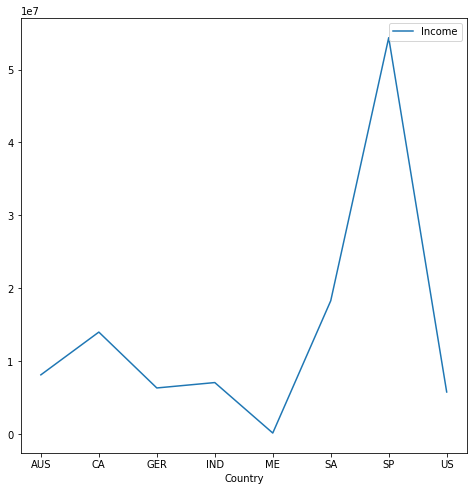

In [17]:
# plot the dataframe
country_df.plot(x="Country", y=["Income"], kind="line", figsize=(8,8))
  
# print bar graph
plt.show()

In [18]:
# Sort income in ascending order
market_df.sort_values(by='Income',ascending = False)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
527,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,3,6,0,0,0,0,0,0,0,SA
731,1503,1976,PhD,Together,162397.0,1,1,2013-06-03,31,85,...,1,1,0,0,0,0,0,0,0,SP
497,1501,1982,PhD,Married,160803.0,0,0,2012-08-04,21,55,...,1,0,0,0,0,0,0,0,0,US
853,5336,1971,Master,Together,157733.0,1,0,2013-06-04,37,39,...,1,1,0,0,0,0,0,0,0,SP
2204,8475,1973,PhD,Married,157243.0,0,1,2014-03-01,98,20,...,0,0,0,0,0,0,0,0,0,IND
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,10311,1969,Graduation,Married,4428.0,0,1,2013-10-05,0,16,...,0,1,0,0,0,0,0,0,0,SP
663,9931,1963,PhD,Married,4023.0,1,1,2014-06-23,29,5,...,0,19,0,0,0,0,0,0,0,SP
1291,11110,1973,Graduation,Single,3502.0,1,0,2013-04-13,56,2,...,0,14,0,0,0,0,0,0,0,IND
961,5376,1979,Graduation,Married,2447.0,1,0,2013-01-06,42,1,...,0,1,0,0,0,0,0,0,0,US


In [19]:
# Remove the outlier in income
market_df = market_df.loc[(market_df["Income"] < 200000)]
market_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-03-07,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-12-03,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,...,10,3,0,0,0,0,0,0,0,IND


In [20]:
# Check the counts for country
market_df.Country.value_counts()

SP     1054
SA      333
CA      263
AUS     158
IND     145
GER     120
US      109
ME        3
Name: Country, dtype: int64

In [21]:
# Remove the country Montenegro as it has only 3 values
market_df = market_df.loc[(market_df["Country"] != 'ME')]
market_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-03-07,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-12-03,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,...,10,3,0,0,0,0,0,0,0,IND


In [23]:
# create a variable to hold the RDS instance address
rds_address = 'marketing-data.c255i23tlogx.us-east-1.rds.amazonaws.com'
# make a connection string for the engine to connect to the database
# "postgresql://[user]:[password]@[location]:[port]/[database]"
db_string = f"postgresql://postgres:postgres@{rds_address}:5432/postgres"
# Create the database engine
engine = create_engine(db_string)
# save the clean DataFrame to a SQL table
market_df.to_sql(name='marketing_data', con=engine, if_exists='replace')